In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
data_headers = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv('D:\Документы/УЧЕБА/МАГА/1 семестр/Демидова/3_4/glass.data', names=data_headers)

In [3]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
ss = StandardScaler()
data_x = data.iloc[:,1:-1]
data_x = ss.fit_transform(data_x)
data_y = data.iloc[:,-1:]

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
sm = SMOTE ()

In [7]:
data_x, data_y = sm.fit_resample(data_x, data_y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(data.iloc[:,1:-1]), 
                                                    data.iloc[:,-1],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=data.iloc[:,-1],
                                                    random_state=322)

In [9]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(data_x,
                                                                    data_y,
                                                                    test_size=0.3,
                                                                    shuffle=True,
                                                                    stratify=data_y,
                                                                    random_state=322)

# SVM классификатор

## До балансировки

In [10]:
from sklearn.svm import SVC
import time

In [11]:
svm = SVC()

In [12]:
t_1 = time.time()
svm.fit(X_train, y_train)
t_2 = time.time()
time_svm = t_2-t_1
print(time_svm)

0.0014884471893310547


In [13]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

### Тренировочная выборка

In [14]:
svm_accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train, y_train_pred, average='weighted')))

Accuracy: 0.7919463087248322
Recall: 0.7919463087248322
Precision: 0.7615437694296755


### Тестовая выборка

In [15]:
svm_accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.7538461538461538
Recall: 0.7538461538461538
Precision: 0.722684766214178


## После балансировки

In [16]:
svm.fit(X_train_res, y_train_res)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [17]:
y_train_res_pred = svm.predict(X_train_res)
y_test_res_pred = svm.predict(X_test_res)

### Тренировочная выборка

In [18]:
svm_accuracy_train_res = accuracy_score(y_train_res, y_train_res_pred)
print("Accuracy: {}".format(accuracy_score(y_train_res, y_train_res_pred)))
print("Recall: {}".format(recall_score(y_train_res, y_train_res_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train_res, y_train_res_pred, average='weighted')))

Accuracy: 0.8808777429467085
Recall: 0.8808777429467085
Precision: 0.8797287499013101


### Тестовая выборка

In [19]:
svm_accuracy_test_res = accuracy_score(y_test_res, y_test_res_pred)
print("Accuracy: {}".format(accuracy_score(y_test_res, y_test_res_pred)))
print("Recall: {}".format(recall_score(y_test_res, y_test_res_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test_res, y_test_res_pred, average='weighted')))

Accuracy: 0.8394160583941606
Recall: 0.8394160583941606
Precision: 0.8327471798274718


## Сравнение до балансировки и после

In [20]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

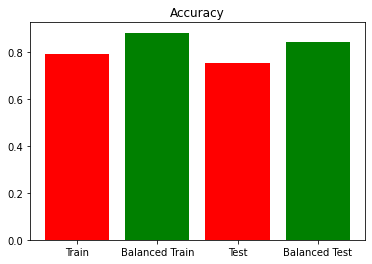

In [21]:
compare_data = [svm_accuracy_train, svm_accuracy_train_res, svm_accuracy_test, svm_accuracy_test_res]
axis = ['Train', 'Balanced Train', 'Test', 'Balanced Test']
plt.title("Accuracy")
plt.bar(axis, compare_data, color=['red', 'green', 'red', 'green'])

# KNN классификатор

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

## Данные до балансировки

In [24]:
t_1 = time.time()
knn.fit(X_train, y_train)
t_2 = time.time()
time_knn = t_2-t_1
print(time_knn)

0.0004951953887939453


In [25]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

### Тренировочная выборка 

In [26]:
knn_accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train, y_train_pred, average='weighted')))

Accuracy: 0.7583892617449665
Recall: 0.7583892617449665
Precision: 0.7244510734443621


### Тестовая выборка

In [27]:
knn_accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.6461538461538462
Recall: 0.6461538461538462
Precision: 0.6263149762719347


## После балансировки

In [28]:
knn.fit(X_train_res, y_train_res)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [29]:
y_train_res_pred = knn.predict(X_train_res)
y_test_res_pred = knn.predict(X_test_res)

### Тренировочная выборка 

In [30]:
knn_accuracy_train_res = accuracy_score(y_train_res, y_train_res_pred)
print("Accuracy: {}".format(accuracy_score(y_train_res, y_train_res_pred)))
print("Recall: {}".format(recall_score(y_train_res, y_train_res_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train_res, y_train_res_pred, average='weighted')))

Accuracy: 0.8683385579937304
Recall: 0.8683385579937304
Precision: 0.8660419076030614


### Тестовая выборка

In [31]:
knn_accuracy_test_res = accuracy_score(y_test_res, y_test_res_pred)
print("Accuracy: {}".format(accuracy_score(y_test_res, y_test_res_pred)))
print("Recall: {}".format(recall_score(y_test_res, y_test_res_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test_res, y_test_res_pred, average='weighted')))

Accuracy: 0.8394160583941606
Recall: 0.8394160583941606
Precision: 0.8315597915036529


## Сравнение до балансировки и после

<BarContainer object of 4 artists>

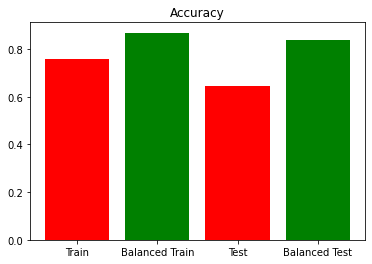

In [32]:
compare_data = [knn_accuracy_train, knn_accuracy_train_res, knn_accuracy_test, knn_accuracy_test_res]
axis = ['Train', 'Balanced Train', 'Test', 'Balanced Test']
plt.title("Accuracy")
plt.bar(axis, compare_data,color=['red', 'green', 'red', 'green'])

# RF классификатор

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()

## До балансировки

In [35]:
t_1 = time.time()
rf.fit(X_train, y_train)
t_2 = time.time()
time_rf = t_2-t_1

In [36]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

### Обучающая выборка

In [37]:
rf_accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train, y_train_pred, average='weighted')))

Accuracy: 0.7718120805369127
Recall: 0.7718120805369127
Precision: 0.776189605670653


### Тестовая выборка

In [38]:
rf_accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.7076923076923077
Recall: 0.7076923076923077
Precision: 0.7157014653594681


## После балансировки

In [39]:
rf.fit(X_train_res, y_train_res)

C:\Users\shars\AppData\Local\Temp/ipykernel_21372/687080805.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_res, y_train_res)


RandomForestClassifier()

### Обучающая выборка

In [40]:
rf_accuracy_train_res = accuracy_score(y_train_res, y_train_res_pred)
print("Accuracy: {}".format(accuracy_score(y_train_res, y_train_res_pred)))
print("Recall: {}".format(recall_score(y_train_res, y_train_res_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_train_res, y_train_res_pred, average='weighted')))

Accuracy: 0.8683385579937304
Recall: 0.8683385579937304
Precision: 0.8660419076030614


### Тестовая выборка

In [41]:
rf_accuracy_test_res = accuracy_score(y_test_res, y_test_res_pred)
print("Accuracy: {}".format(accuracy_score(y_test_res, y_test_res_pred)))
print("Recall: {}".format(recall_score(y_test_res, y_test_res_pred, average='weighted')))
print("Precision: {}".format(f1_score(y_test_res, y_test_res_pred, average='weighted')))

Accuracy: 0.8394160583941606
Recall: 0.8394160583941606
Precision: 0.8315597915036529


## Сравнение до балансировки и после

<BarContainer object of 4 artists>

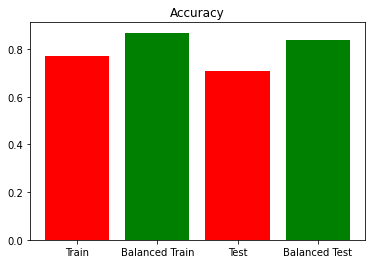

In [42]:
compare_data = [rf_accuracy_train, rf_accuracy_train_res, rf_accuracy_test, rf_accuracy_test_res]
axis = ['Train', 'Balanced Train', 'Test', 'Balanced Test']
plt.title("Accuracy")
plt.bar(axis, compare_data,color=['red', 'green', 'red', 'green'])

## Визуализация данных

In [43]:
from sklearn.manifold import TSNE
import seaborn as sns

### Данные до балансировки

In [44]:
tsne = TSNE(init='random', perplexity=10).fit_transform(data.iloc[:,1:-1])

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [45]:
df = pd.DataFrame()
df["y"] = data.iloc[:,-1]
df["comp-1"] = tsne[:,0]
df["comp-2"] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

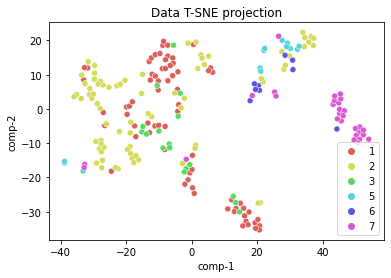

In [46]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="Data T-SNE projection") 

### Данные после балансировки

In [47]:
tsne_res = TSNE(init='random', perplexity=10).fit_transform(data_x)

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [48]:
df_res = pd.DataFrame()
df_res['y'] = data_y
df_res["comp-1"] = tsne_res[:,0]
df_res["comp-2"] = tsne_res[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

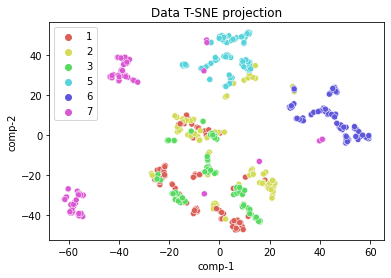

In [49]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_res.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df_res).set(title="Data T-SNE projection") 

# Сравнение классификаторов

## По времени

Elapsed time in seconds
SVM: 0.0014884471893310547
KNN: 0.0004951953887939453
RF: 0.09027385711669922


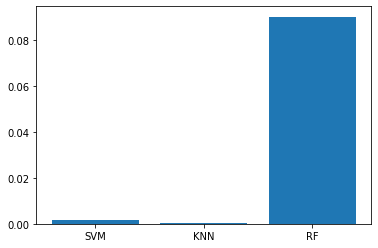

In [50]:
time_data = [time_svm, time_knn, time_rf]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, time_data)
print("Elapsed time in seconds\nSVM: {}\nKNN: {}\nRF: {}".format(time_svm, time_knn, time_rf))

## По точности

### На тренировочной выборке

Train accuracy
SVM: 0.7919463087248322
KNN: 0.7583892617449665
RF: 0.7718120805369127


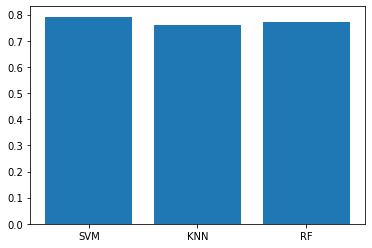

In [51]:
accuracy_data = [svm_accuracy_train, knn_accuracy_train, rf_accuracy_train]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracy_data)
print("Train accuracy\nSVM: {}\nKNN: {}\nRF: {}".format(svm_accuracy_train, knn_accuracy_train, rf_accuracy_train))

### На тестовой выборке

Test accuracy
SVM: 0.7538461538461538
KNN: 0.6461538461538462
RF: 0.7076923076923077


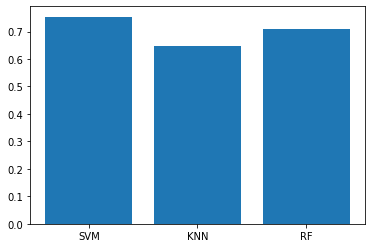

In [52]:
accuracy_data_test = [svm_accuracy_test, knn_accuracy_test, rf_accuracy_test]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracy_data_test)
print("Test accuracy\nSVM: {}\nKNN: {}\nRF: {}".format(svm_accuracy_test, knn_accuracy_test, rf_accuracy_test))